<h1><b>COVID-19 Trends Analysis</b></h1>
This project analyzes global COVID-19 data to understand trends in confirmed cases, deaths, and Case Fatality Rates (CFR) across different countries. Using Python, the analysis visualizes patterns over time and compares countries to highlight the impact of local responses and population factors.

<b>Project Objective:</b><br>
The objective is to explore COVID-19 trends through data, identify key patterns and insights, and demonstrate how data-driven analysis can support public health decision-making.

<h3><b>Import Libraries & Dataset

In [92]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
df = pd.read_csv('owid-covid-data.csv')

<h3><b>Exploring Dataset

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44521 non-null  object 
 1   continent                        44257 non-null  object 
 2   location                         44785 non-null  object 
 3   date                             44785 non-null  object 
 4   total_cases                      44182 non-null  float64
 5   new_cases                        43982 non-null  float64
 6   new_cases_smoothed               43200 non-null  float64
 7   total_deaths                     44182 non-null  float64
 8   new_deaths                       43982 non-null  float64
 9   new_deaths_smoothed              43200 non-null  float64
 10  total_cases_per_million          43918 non-null  float64
 11  new_cases_per_million            43918 non-null  float64
 12  new_cases_smoothed

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.418200e+04,43982.000000,43200.000000,44182.000000,43982.000000,43200.000000,43918.000000,43918.000000,43135.000000,43918.000000,...,39442.000000,26322.000000,39967.000000,41366.000000,31358.000000,30963.000000,18658.000000,36139.000000,43963.000000,38558.000000
mean,9.372153e+04,1388.770224,1372.258368,3885.163189,43.323360,43.329499,1778.176471,23.573850,23.160618,55.320410,...,20979.943732,12.029018,251.347231,8.048869,10.834007,32.637049,52.576272,3.115428,74.052595,0.725580
std,9.707004e+05,12665.458657,12420.794948,36227.966483,366.554434,356.193423,3814.416468,72.289186,55.613758,140.662359,...,20466.166309,19.158253,117.620708,4.143192,10.481952,13.408593,31.579386,2.530433,7.364382,0.152673
min,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.300000e+01,0.000000,0.571000,0.000000,0.000000,0.000000,25.373750,0.000000,0.123000,0.000000,...,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000,0.606000
50%,9.370000e+02,9.000000,14.143000,17.000000,0.000000,0.143000,266.509000,1.475500,2.838000,4.566000,...,14103.452000,1.800000,238.339000,7.110000,6.400000,31.400000,55.182000,2.500000,75.490000,0.755000
75%,9.989000e+03,156.000000,160.857000,213.000000,3.000000,3.000000,1793.012500,16.551500,18.200500,33.616750,...,32415.132000,16.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000,0.853000
max,3.054045e+07,313658.000000,288630.000000,952724.000000,10491.000000,7456.714000,42663.811000,4944.376000,882.924000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


<h3><b> Data Cleaning & Preparation

In [3]:
df.isnull().sum()

iso_code                             264
continent                            528
location                               0
date                                   0
total_cases                          603
new_cases                            803
new_cases_smoothed                  1585
total_deaths                         603
new_deaths                           803
new_deaths_smoothed                 1585
total_cases_per_million              867
new_cases_per_million                867
new_cases_smoothed_per_million      1650
total_deaths_per_million             867
new_deaths_per_million               867
new_deaths_smoothed_per_million     1650
new_tests                          29138
total_tests                        28763
total_tests_per_thousand           28763
new_tests_per_thousand             29138
new_tests_smoothed                 27217
new_tests_smoothed_per_thousand    27217
tests_per_case                     28636
positive_rate                      28252
tests_units     

<h3><b> Droping irrelevent columns and add values to empty cells

In [4]:
# Drop irrelevant columns
df = df.drop(columns=[
    'iso_code','continent',
    'new_tests','total_tests','total_tests_per_thousand',
    'new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand',
    'tests_per_case','positive_rate','tests_units',
    'stringency_index','population_density','median_age','aged_65_older','aged_70_older',
    'gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence',
    'female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand',
    'life_expectancy','human_development_index'
], errors='ignore')

# Fill missing numeric columns
for col in ['total_cases','new_cases','new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed']:
    df[col] = df[col].fillna(0)

df['population'] = df['population'].fillna(df['population'].mean())

<h3><b> Focusing Few Countries

In [77]:
# Filter dataset for selected countries
countries = ['United States', 'India', 'Pakistan', 'Italy']
df_focus = df[df['location'].isin(countries)]

# 5 random rows per country
df_sample = df_focus.groupby("location").head(5)

print(df_sample[['location', 'date', 'new_cases']])

            location        date  new_cases
18696          India  2019-12-31        0.0
18697          India  2020-01-01        0.0
18698          India  2020-01-02        0.0
18699          India  2020-01-03        0.0
18700          India  2020-01-04        0.0
20463          Italy  2019-12-31        0.0
20464          Italy  2020-01-01        0.0
20465          Italy  2020-01-02        0.0
20466          Italy  2020-01-03        0.0
20467          Italy  2020-01-04        0.0
30700       Pakistan  2019-12-31        0.0
30701       Pakistan  2020-01-01        0.0
30702       Pakistan  2020-01-02        0.0
30703       Pakistan  2020-01-03        0.0
30704       Pakistan  2020-01-04        0.0
42113  United States  2019-12-31        0.0
42114  United States  2020-01-01        0.0
42115  United States  2020-01-02        0.0
42116  United States  2020-01-03        0.0
42117  United States  2020-01-04        0.0


<h3><b> Feature Engineering for Cases and Deaths

In [79]:
df_focus.loc[:,"new_cases_7day"] = df_focus["new_cases"].rolling(7).mean()
df_focus.loc[:,"new_deaths_7day"] = df_focus["new_deaths"].rolling(7).mean()
df_focus.loc[:,"new_cases_per_million_7d"] = df_focus["new_cases_per_million"].rolling(7).mean()
df_focus.loc[:,"CFR"] = (df_focus["total_deaths"] / df_focus["total_cases"]) * 100

<h3> <b>Exploratory Data Analysis (EDA)</b></h3>
<h4><b>Cases & Deaths Over Time in case of Pakistan

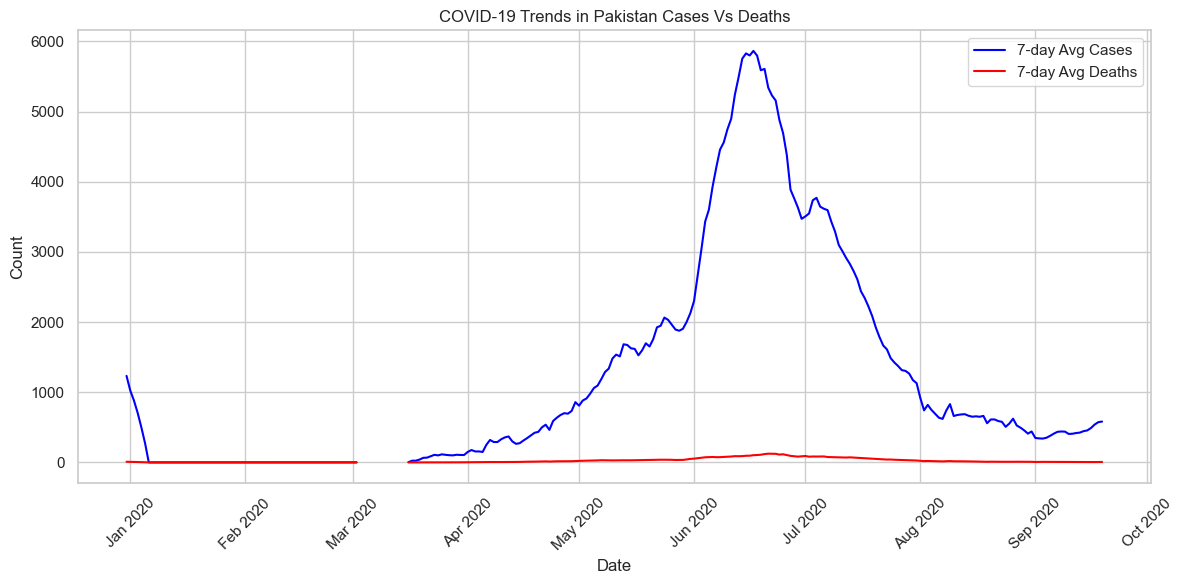

In [99]:
# Ensure 'date' is in datetime format
df_focus['date'] = pd.to_datetime(df_focus['date'], errors='coerce')

# Select one country (Pakistan in this case)
country = "Pakistan"
df_country = df_focus[df_focus["location"] == country]

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_country["date"], df_country["new_cases_7day"], label="7-day Avg Cases", color="blue")
plt.plot(df_country["date"], df_country["new_deaths_7day"], label="7-day Avg Deaths", color="red")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Count")
plt.title(f"COVID-19 Trends in {country} Cases Vs Deaths")
plt.legend()

#  Format x-axis to show one tick per month (cleaner timeline)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3><b>Compare Multiple Countries 

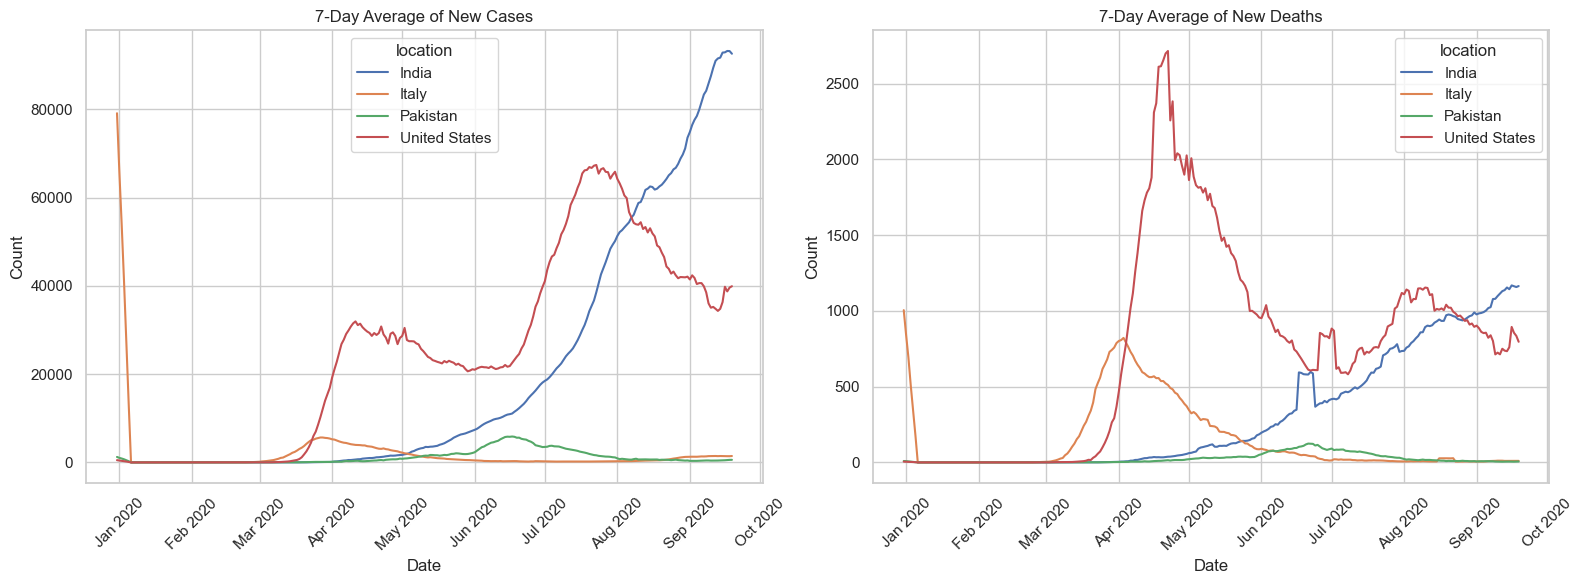

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)


sns.lineplot(data=df_focus, x='date', y='new_cases_7day', hue='location', ax=axes[0])
axes[0].set_title("7-Day Average of New Cases")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Count")


sns.lineplot(data=df_focus, x='date', y='new_deaths_7day', hue='location', ax=axes[1])
axes[1].set_title("7-Day Average of New Deaths")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Count")


for ax in axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<h3><b> CFR (Case Fatality Rate) Over Time

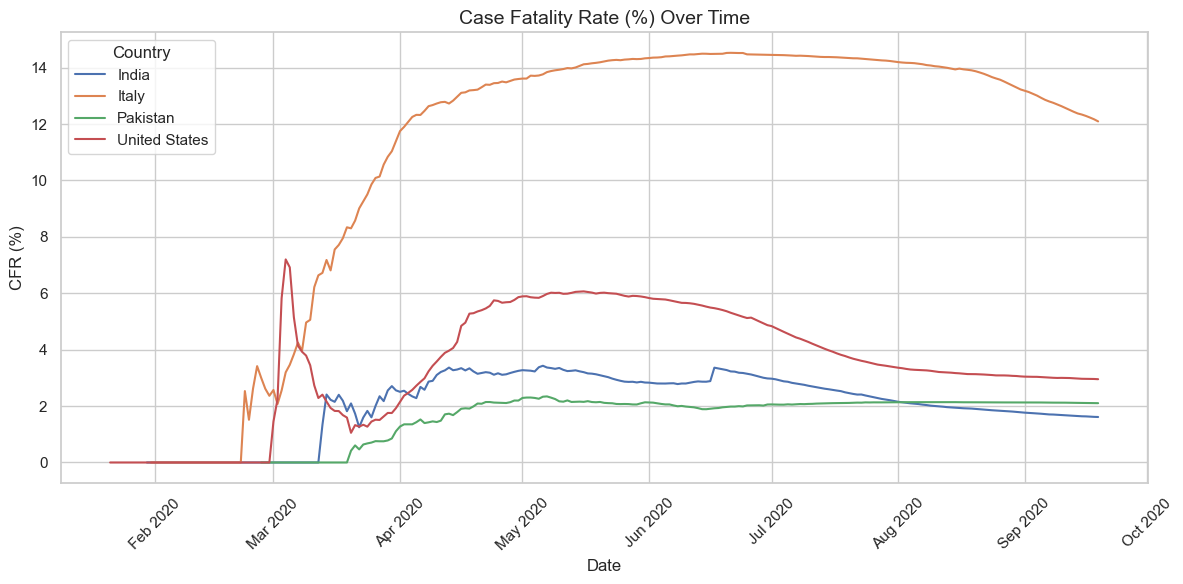

In [95]:
# Ensure 'date' is in datetime format
df_focus['date'] = pd.to_datetime(df_focus['date'], errors='coerce')

# Plot CFR over time for multiple countries
plt.figure(figsize=(12,6))
sns.lineplot(data=df_focus, x="date", y="CFR", hue="location")

# Title and labels
plt.title("Case Fatality Rate (%) Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("CFR (%)")

# Format x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add legend and layout adjustments
plt.legend(title="Country")
plt.tight_layout()
plt.show()

<h3><b>Correlation & Insights

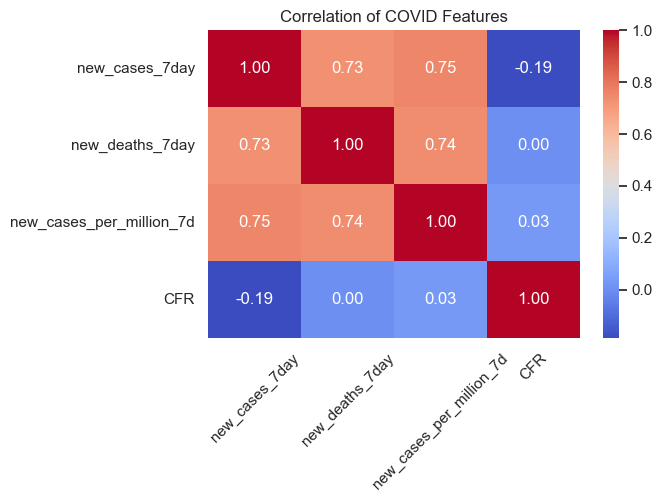

In [61]:
corr = df_focus[["new_cases_7day","new_deaths_7day","new_cases_per_million_7d","CFR"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of COVID Features")
plt.xlabel("")
plt.ylabel()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<h3><b>Top 10 Countries by New Cases (Latest Data)

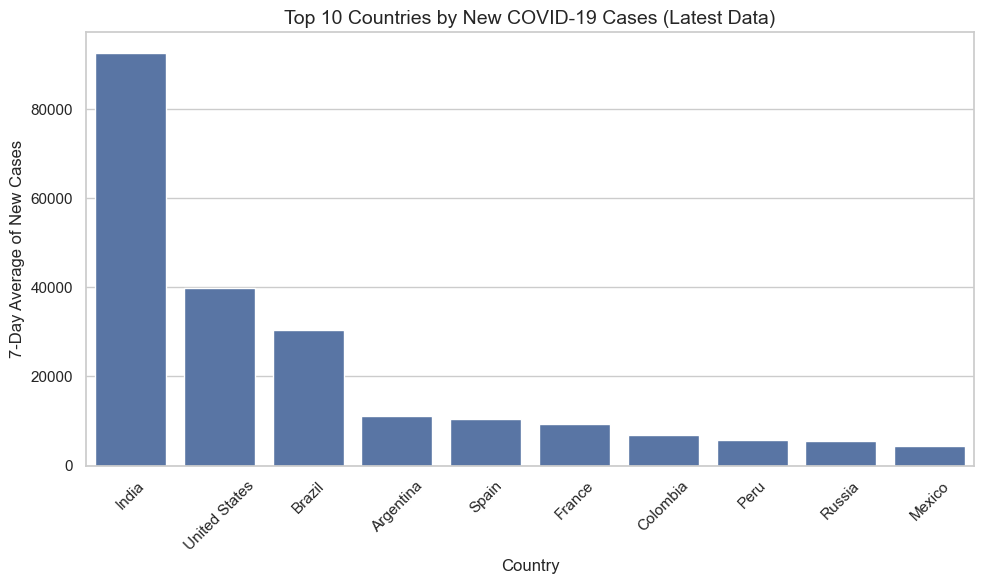

In [68]:
# Step 4 (compute 7-day rolling average)
df["new_cases_7day"] = df.groupby("location")["new_cases"].transform(lambda x: x.rolling(7).mean())

# Step 5 (top 10 countries latest)
df_focus = df.copy()

# Get the latest data for each country
latest = df_focus.groupby("location").tail(1)

# Remove aggregate entries like continents or world
latest = latest[~latest["location"].isin([
    "World", "Africa", "Asia", "Europe", "European Union", 
    "North America", "South America", "Oceania"
])]
# Filter out small countries (population less than 1 million)
latest = latest[latest["population"] > 1_000_000]

# Sort by 7-day rolling average of new cases
top10 = latest.sort_values("new_cases_7day", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="location", y="new_cases_7day")
plt.title("Top 10 Countries by New COVID-19 Cases (Latest Data)", fontsize=14)
plt.xlabel("Country")
plt.ylabel("7-Day Average of New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3><b>Summary of COVID-19 Data Analysis </b></h3>

In this analysis, we explored global COVID-19 trends using the Our World in Data dataset. The focus was on confirmed cases, deaths, and the derived Case Fatality Rate (CFR) across multiple countries.

We began by cleaning and preparing the dataset using Pandas and NumPy, removing missing or irrelevant data. Rolling averages were computed to smooth short-term fluctuations, providing clearer insights into the pandemic’s progression over time.

Through visualizations with Matplotlib and Seaborn, several key patterns emerged:

<b>Trends Over Time:</b>
The 7-day average of new cases revealed multiple waves across all countries, with peaks aligning with major global outbreaks.

<b>Country Comparisons:</b>
When comparing countries like the United States, India, Pakistan, and Italy, the timelines showed that each experienced surges at different periods, reflecting local outbreak responses and containment efforts.

<b>Case Fatality Rate (CFR):</b>
The CFR plots indicated a general decline over time, suggesting improvements in healthcare response, testing availability, and vaccination coverage (where applicable).

<b>Top 10 Countries by New Cases:</b>
Analysis of the most recent data showed that large, densely populated countries still reported higher rolling averages of new cases, emphasizing ongoing health and policy challenges.

Overall, the findings highlight how data-driven monitoring can reveal patterns that inform public health decisions. Even with data limitations (e.g., missing vaccination data), this intermediate-level analysis demonstrates the power of Python-based tools for extracting actionable insights from complex, real-world datasets.

<h3><b> Saving New and Cleaned Dataset in CSV form

In [100]:
df.to_csv('Cleaned COVID-19 Trends Analysis.csv', index=False)
print("Both Analysis and Cleaned Data are done")

Both Analysis and Cleaned Data are done
